Correlation Analysis Project

In [1]:
#importing the libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [2]:
#importing the csv file
df = pd.read_csv(r'/home/shashwat/Disc3_Official/corelationProject/movies.csv')

In [3]:
df.head() #viewing the imported csv

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


Data Cleaning

In [4]:
#checking for missing data column wise

for col in df.columns:
    percentMissing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, np.round(percentMissing, decimals=1)))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.3%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [5]:
#checking for irregular dataTypes

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [6]:
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [ ]:
#resolving NaN error
df = df.dropna(subset=['budget', 'gross']) #drop NaN

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [ ]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124.0
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99.0
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101.0
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100.0


In [24]:
#order by grossRevenue

df = df.sort_values(by = ['gross'], inplace=False, ascending=False)
pd.set_option('display.max_rows', 7)
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0
7667,Tee em el,NaN,Horror,2020,"August 19, 2020 (United States)",5.7,7.0,Pereko Mosia,Pereko Mosia,Siyabonga Mabaso,South Africa,NaN,NaN,PK 65 Films,102.0


What is Correlation?

In statistics, correlation refers to the statistical association or relationship between two or more variables. It measures the degree to which changes in one variable are associated with changes in another variable. Correlation does not imply causation; it simply indicates the strength and direction of a linear relationship between variables.

The most common measure of correlation is the correlation coefficient, which quantifies the strength and direction of the linear relationship.

Correlation Testing

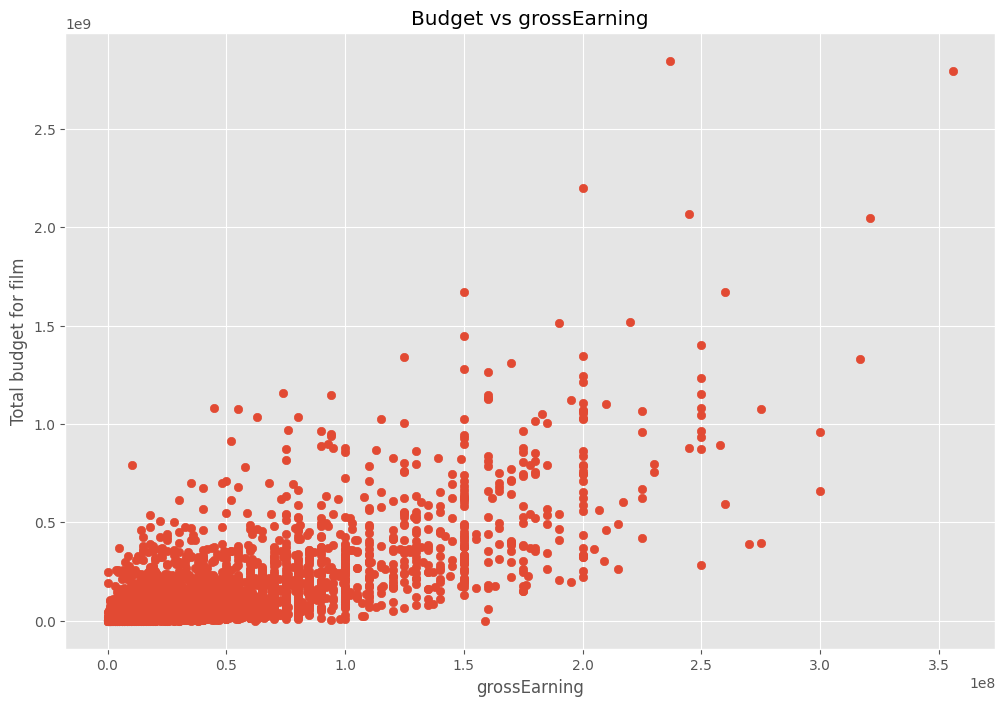

In [25]:
#Scatter plot budget vs gross

plt.scatter(x = df['budget'], y = df['gross'])
plt.title('Budget vs grossEarning')
plt.xlabel('grossEarning')
plt.ylabel('Total budget for film')
plt.show()

In [ ]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctYear
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,Dece
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,Apri
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,Dece
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,Dece
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,Apri


<Axes: xlabel='budget', ylabel='gross'>

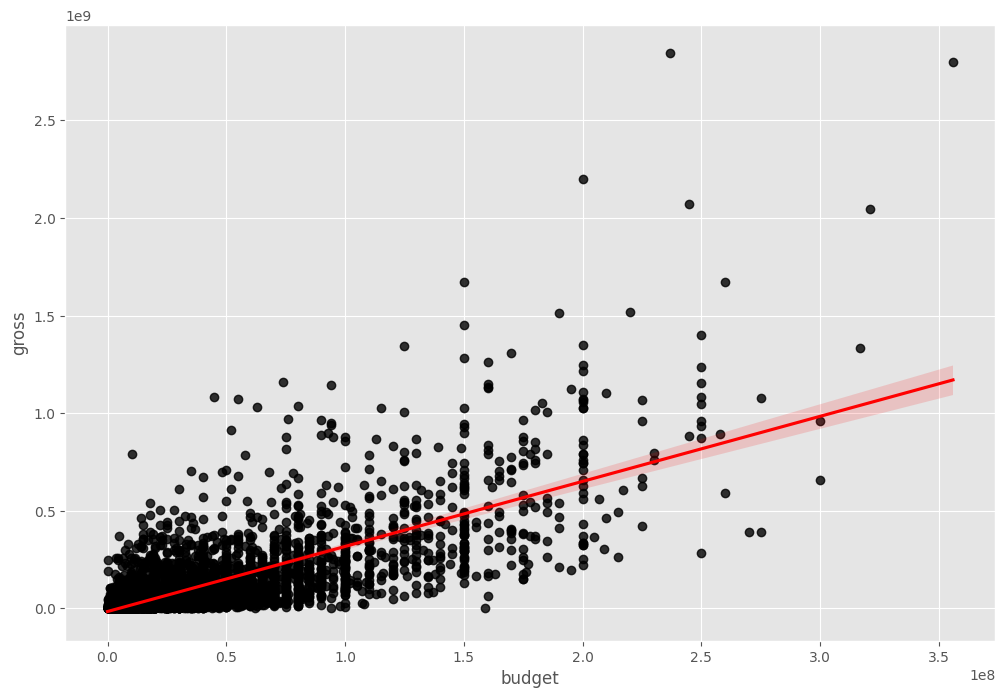

In [26]:
#Using regression plot to check correlation

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color":"black"}, line_kws={"color":"red"})

The three main types of correlation coefficients—Pearson, Kendall, and Spearman—capture different aspects of relationships between variables and are used in various scenarios. 

1. The Pearson correlation coefficient measures the linear relationship between two continuous variables.

In [27]:
numeric_columns = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_columns.corr(method='pearson')

print(correlation_matrix)

             year     score     votes    budget     gross   runtime
year     1.000000  0.097995  0.222945  0.329321  0.257486  0.120811
score    0.097995  1.000000  0.409182  0.076254  0.186258  0.399451
votes    0.222945  0.409182  1.000000  0.442429  0.630757  0.309212
budget   0.329321  0.076254  0.442429  1.000000  0.740395  0.320447
gross    0.257486  0.186258  0.630757  0.740395  1.000000  0.245216
runtime  0.120811  0.399451  0.309212  0.320447  0.245216  1.000000


2. The Kendall correlation coefficient assesses the strength and direction of the monotonic relationship between two variables (continuous or discrete).

In [28]:
correlation_matrix = numeric_columns.corr(method='kendall')
print(correlation_matrix)

             year     score     votes    budget     gross   runtime
year     1.000000  0.067652  0.331465  0.224120  0.200618  0.097184
score    0.067652  1.000000  0.300115 -0.000566  0.086046  0.283611
votes    0.331465  0.300115  1.000000  0.353702  0.548899  0.198240
budget   0.224120 -0.000566  0.353702  1.000000  0.512637  0.235483
gross    0.200618  0.086046  0.548899  0.512637  1.000000  0.168933
runtime  0.097184  0.283611  0.198240  0.235483  0.168933  1.000000


3. Similar to Kendall, Spearman's correlation coefficient evaluates the strength and direction of the monotonic relationship between two variables. It is calculated based on the ranks of the data.

In [29]:
correlation_matrix = numeric_columns.corr(method='spearman')
print(correlation_matrix)

             year     score     votes    budget     gross   runtime
year     1.000000  0.099045  0.469829  0.317336  0.293084  0.142977
score    0.099045  1.000000  0.428138 -0.001403  0.126116  0.399857
votes    0.469829  0.428138  1.000000  0.502466  0.742050  0.290159
budget   0.317336 -0.001403  0.502466  1.000000  0.693670  0.336370
gross    0.293084  0.126116  0.742050  0.693670  1.000000  0.246243
runtime  0.142977  0.399857  0.290159  0.336370  0.246243  1.000000


We notice high correlation between Gross and Budget

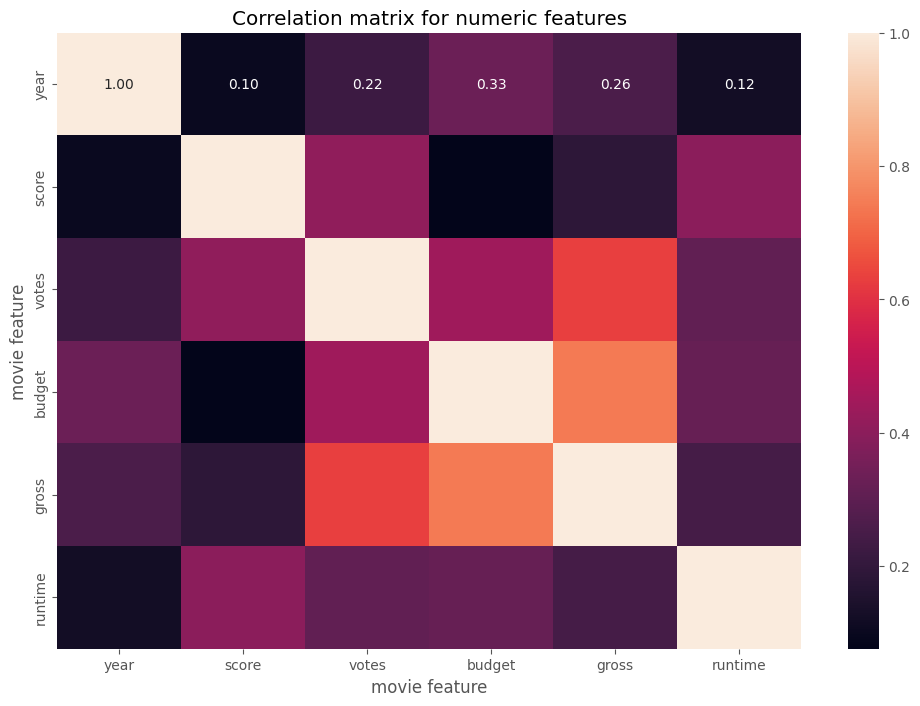

In [30]:
#Visuallizing Correlation

correlation_matrix = numeric_columns.corr(method = 'pearson')
sns.heatmap(correlation_matrix, annot=True, fmt = ".2f")
plt.title('Correlation matrix for numeric features')
plt.xlabel('movie feature')
plt.ylabel('movie feature')
plt.show()

In [33]:
correlation_matrix = numeric_columns.corr(method = 'pearson')
corr_pairs = correlation_matrix.unstack()

corr_pairs

year     year       1.000000
         score      0.097995
         votes      0.222945
                      ...   
runtime  budget     0.320447
         gross      0.245216
         runtime    1.000000
Length: 36, dtype: float64

In [34]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

score    budget     0.076254
budget   score      0.076254
score    year       0.097995
                      ...   
budget   budget     1.000000
score    score      1.000000
runtime  runtime    1.000000
Length: 36, dtype: float64

In [35]:
high_corr = sorted_pairs[(sorted_pairs)>0.5]
high_corr

gross    votes      0.630757
votes    gross      0.630757
budget   gross      0.740395
                      ...   
         budget     1.000000
score    score      1.000000
runtime  runtime    1.000000
Length: 10, dtype: float64

Conclusion: Therefore we can confirm that Budget and Votes have highest correlation with Gross